In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data = pd.read_csv("data.csv",header=None)

In [3]:
data = data.sample(frac=1)
input_dim = len(data.columns) - 1

In [4]:
data = data.astype("float32")

In [5]:
data = data.to_numpy()

In [6]:
data.shape

(4169, 257)

In [7]:
training = data[0:3000]
validating = data[3000:3500]
testing = data[3500:]

In [8]:
print(training.shape)
print(validating.shape)
print(testing.shape)

(3000, 257)
(500, 257)
(669, 257)


In [9]:
training_features = training[:,0:-1]
training_labels = training[:,-1]

In [10]:
print(training_features.shape)
print(training_labels.shape)

(3000, 256)
(3000,)


In [11]:
testing_features = testing[:,0:-1]
testing_labels = testing[:,-1]

In [12]:
print(testing_features.shape)
print(testing_labels.shape)

(669, 256)
(669,)


In [13]:
validating_features = validating[:,0:-1]
validating_labels = validating[:,-1]

In [14]:
print(validating_features.shape)
print(validating_labels.shape)

(500, 256)
(500,)


In [49]:
input_dim=256
model = Sequential([
# layers.Input(shape=(256,)),
layers.Dense(32, input_dim = input_dim , activation = 'relu'),
layers.Dense(32, input_dim = input_dim , activation = 'relu'),
layers.Dense(32, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(128, input_dim = input_dim , activation = 'relu'),
layers.Dense(128, input_dim = input_dim , activation = 'relu'),
layers.Dense(128, input_dim = input_dim , activation = 'relu'),
layers.Dense(128, input_dim = input_dim , activation = 'relu'),
layers.Dense(5, activation='softmax')
    
])

In [50]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
epochs = 20
history = model.fit(training_features,training_labels,
                    epochs=epochs,
                    validation_data=(validating_features,validating_labels))

Epoch 1/20
94/94 [==============================] - 2s 9ms/step - loss: 1.2841 - accuracy: 0.5540 - val_loss: 0.7206 - val_accuracy: 0.6820
Epoch 2/20
94/94 [==============================] - 1s 6ms/step - loss: 0.6509 - accuracy: 0.7403 - val_loss: 0.4787 - val_accuracy: 0.8200
Epoch 3/20
94/94 [==============================] - 1s 6ms/step - loss: 0.5507 - accuracy: 0.7980 - val_loss: 0.5154 - val_accuracy: 0.8100
Epoch 4/20
94/94 [==============================] - 1s 6ms/step - loss: 0.4540 - accuracy: 0.8293 - val_loss: 0.4311 - val_accuracy: 0.8100
Epoch 5/20
94/94 [==============================] - 1s 6ms/step - loss: 0.4244 - accuracy: 0.8307 - val_loss: 0.4130 - val_accuracy: 0.8200
Epoch 6/20
94/94 [==============================] - 1s 6ms/step - loss: 0.3459 - accuracy: 0.8640 - val_loss: 0.2897 - val_accuracy: 0.8720
Epoch 7/20
94/94 [==============================] - 1s 6ms/step - loss: 0.3509 - accuracy: 0.8697 - val_loss: 0.3093 - val_accuracy: 0.8820
Epoch 8/20
94/94 [==

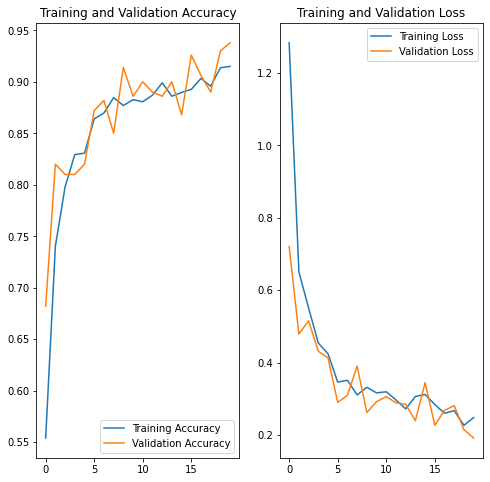

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
results = model.evaluate(testing_features, testing_labels)
print("test loss, test acc:", results)
np.set_printoptions(suppress=True)

# muszlowy - 0
# gothic - 1
# york - 2
# light - 3
# barwy_jesieni - 4

predictions = model.predict(testing_features[10:20])

print("\nRzeczywiste wartości: ",testing_labels[10:20].astype("int32"))
print("Przewidziane wartości:",np.argmax(predictions, axis=1))

21/21 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9223
test loss, test acc: [0.23278263211250305, 0.9222720265388489]
1/1 [==============================] - 0s 19ms/step

Rzeczywiste wartości:  [4 4 0 1 2 1 4 2 3 4]
Przewidziane wartości: [1 4 0 1 2 1 4 2 3 4]


In [62]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="cp.ckpt",
                                                 save_weights_only=True,
                                                 verbose=1)
checkpoint_path = "cp.ckpt"

In [63]:
model.save_weights(checkpoint_path.format(epoch=20))

In [64]:
model.save('bruk_deep_learning')

INFO:tensorflow:Assets written to: bruk_deep_learning/assets
